In [24]:
from scipy import integrate as inte
import numpy as np
import matplotlib.pyplot as plt
from numpy import log as ln
G = 6.67*(10**(-8))*(1/(3.08*(10**18)))**3
R = np.linspace(10,30*10**3)
R_b = np.linspace(10, 20*10**3)
h = 10 * 10**3

from astropy.table import QTable
from scipy.optimize import curve_fit
import astropy.units as u

DTable = QTable.read('7443-12705_rot_curve_data.txt', format='ascii.ecsv')
R = np.linspace(10,10*10**3)

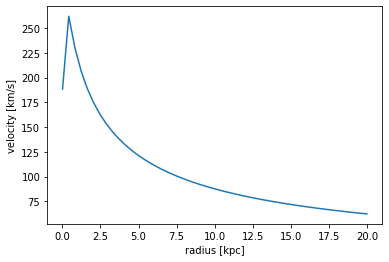

In [6]:
# de Vaucouleurs bulge
sigma_be = 3.2 * (10 ** 3) * 1.988 * (10 ** 33)
r_b = 0.5 * 10 ** 3
gamma = 3.3308
kappa = gamma*ln(10)

def sigma_b(x):
    return sigma_be*np.exp(-1*kappa*((x/r_b)**0.25-1))
                           
# derivative of sigma with respect to r
def dsdx(x):
    return sigma_b(x)*(-0.25*kappa)*(r_b**-0.25)*(x**-0.75)

# integrand for getting denisty
def density_integrand(x,r):
    return -(1/np.pi)*dsdx(x)/np.sqrt(x**2-r**2)

def mass_integrand(r):
    vol_den, vol_den_err = inte.quad(density_integrand, r, np.inf, args=(r))
    return 4*np.pi*vol_den*r**2
    
# getting a massx
def velocity(r):
    bulge_mass = np.zeros(len(r))
    vel = np.zeros(len(r))
    for i,val in enumerate(r):
        bulge_mass[i],err = inte.quad(mass_integrand, 0, val)
        vel[i] = np.sqrt(bulge_mass[i]*G/val)
    return vel

plt.plot(R_b/1000,velocity(R_b)*(3.08*10**13))
plt.ylabel('velocity [km/s]')
plt.xlabel('radius [kpc]')
plt.show()

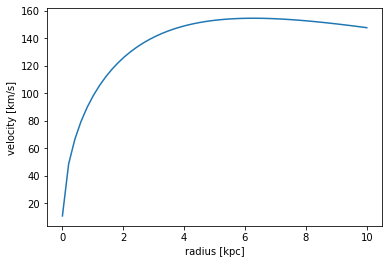

In [7]:
# Exponential Disk
sigma_dc = 8.44 * (10 ** 2) * (1.988*10**33)
r_d = 3.5 * 10**3

def sigma_d(r):
    return sigma_dc*np.exp(-1*(r/r_d))

def integrand_d(r):
    return 2*np.pi*sigma_d(r)*r

def m_d(r):
    res = np.zeros_like(r)
    for i, val in enumerate(r):
        y, err = inte.quad(integrand_d, 0, val)
        res[i] = y
    return res

def v_d(r):
    return np.sqrt((m_d(r)*G)/r)

plt.plot(R/1000,v_d(R)*(3.08*10**13))
plt.ylabel('velocity [km/s]')
plt.xlabel('radius [kpc]')
plt.show()

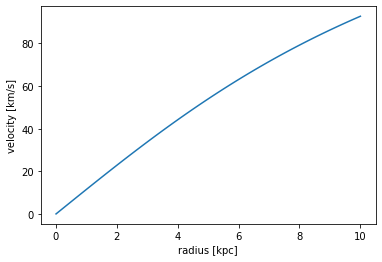

In [8]:
# Isothermal 
rho_0_iso = 0.74 * (h/(10**3))**-2 * (1.988 * 10**33)

def rho_iso(r):
    return rho_0_iso/(1 + (r/h)**2)
def integrand_h_iso(r):
    return 4*np.pi*rho_iso(r)*r**2
def m_h_iso(r):
    res = np.zeros_like(r)
    for i, val in enumerate(r):
        y, err = inte.quad(integrand_h_iso, 0, val)
        res[i] = y
    return res
def v_h_iso(r):
    return np.sqrt((m_h_iso(r)*G)/r)

plt.plot(R/1000,v_h_iso(R)*(3.08*10**13))
plt.ylabel('velocity [km/s]')
plt.xlabel('radius [kpc]')
plt.show()

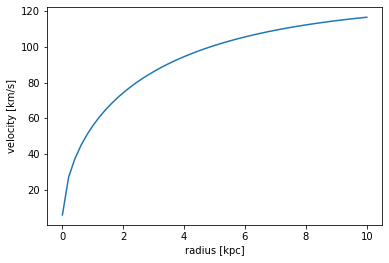

In [9]:
# NFW
rho_0_NFW = rho_0_bur = 1.3 * (h/(10**3))**-2 * (1.988 * 10**33)

def rho_NFW(r):
    return rho_0_NFW/((r/h)*(1 + (r/h))**2)

def integrand_h_NFW(r):
    return 4*np.pi*rho_NFW(r)*r**2

def m_h_NFW(r):
    res = np.zeros_like(r)
    for i, val in enumerate(r):
        y, err = inte.quad(integrand_h_NFW, 0, val)
        res[i] = y
    return res

def v_h_NFW(r):
    return np.sqrt((m_h_NFW(r)*G)/r)

plt.plot(R/1000,v_h_NFW(R)*(3.08*10**13))
plt.ylabel('velocity [km/s]')
plt.xlabel('radius [kpc]')
plt.show()

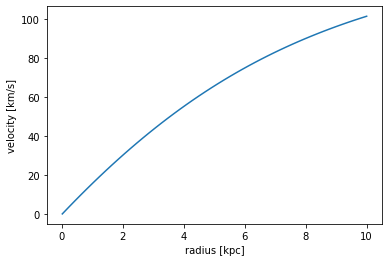

In [10]:
# Burkert 
rho_0_bur = 1.5* (h/(10**3))**-2 * (1.988 * 10**33)

def rho_bur(r):
    return rho_0_bur/((1 + (r/h))*(1 + (r/h)**2))
def integrand_h_bur(r):
    return 4*np.pi*rho_bur(r)*r**2
def m_h_bur(r):
    res = np.zeros_like(r)
    for i, val in enumerate(r):
        y, err = inte.quad(integrand_h_bur, 0, val)
        res[i] = y
    return res
def v_h_bur(r):
    return np.sqrt((m_h_bur(r)*G)/r)

plt.plot(R/1000,v_h_bur(R)*(3.08*10**13))
plt.ylabel('velocity [km/s]')
plt.xlabel('radius [kpc]')
plt.show()

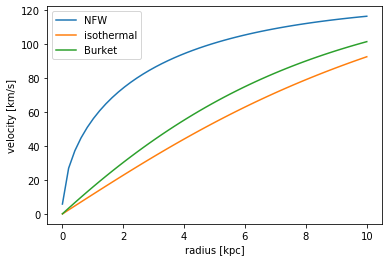

In [11]:
plt.plot(R/1000,v_h_NFW(R)*(3.08*10**13), label='NFW')
plt.plot(R/1000,v_h_iso(R)*(3.08*10**13), label='isothermal')
plt.plot(R/1000,v_h_bur(R)*(3.08*10**13), label='Burket')
plt.ylabel('velocity [km/s]')
plt.xlabel('radius [kpc]')
plt.legend()
plt.show()

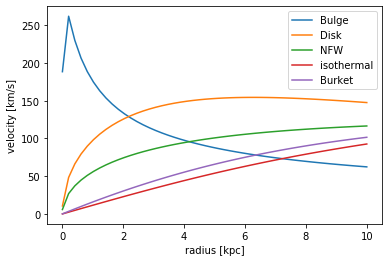

In [12]:
plt.plot(R/1000,velocity(R_b)*(3.08*10**13), label= 'Bulge')
plt.plot(R/1000,v_d(R)*(3.08*10**13), label = 'Disk')
plt.plot(R/1000,v_h_NFW(R)*(3.08*10**13), label='NFW')
plt.plot(R/1000,v_h_iso(R)*(3.08*10**13), label='isothermal')
plt.plot(R/1000,v_h_bur(R)*(3.08*10**13), label='Burket')
plt.ylabel('velocity [km/s]')
plt.xlabel('radius [kpc]')
plt.legend()
plt.show()

In [13]:
vel_t = np.sqrt(velocity(R_b)**2 + v_d(R)**2 + v_h_iso(R)**2)
vel_t_1 = np.sqrt(velocity(R_b)**2 + v_d(R)**2 + v_h_NFW(R)**2)
vel_t_2 = np.sqrt(velocity(R_b)**2 + v_d(R)**2 + v_h_bur(R)**2)

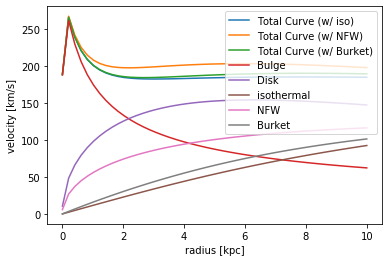

In [14]:
plt.plot(R/1000,vel_t*(3.08*10**13),label = 'Total Curve (w/ iso)')
plt.plot(R/1000,vel_t_1*(3.08*10**13),label = 'Total Curve (w/ NFW)')
plt.plot(R/1000,vel_t_2*(3.08*10**13),label = 'Total Curve (w/ Burket)')
plt.plot(R/1000,velocity(R_b)*(3.08*10**13), label= 'Bulge')
plt.plot(R/1000,v_d(R)*(3.08*10**13), label = 'Disk')
plt.plot(R/1000,v_h_iso(R)*(3.08*10**13), label='isothermal')
plt.plot(R/1000,v_h_NFW(R)*(3.08*10**13), label='NFW')
plt.plot(R/1000,v_h_bur(R)*(3.08*10**13), label='Burket')
plt.ylabel('velocity [km/s]')
plt.xlabel('radius [kpc]')
plt.legend(loc='upper right')
plt.show()

# Try and fit (one halo) given data 
    To read the data (Qtable astropy) in and plot them 
    Use scipy.optimize.curvefit
    Break down the velocities --> solve for different parameters
   


In [26]:
r_dep = DTable['deprojected_distance'].data
max_vel = DTable['max_velocity'].data
min_vel = DTable['min_velocity'].data
ave_vel = DTable['rot_vel_avg'].data

In [27]:
print(velocity(r_dep))

[2.64153650e-12 3.49493501e-12 4.06823266e-12 4.50461633e-12
 4.85761778e-12 5.15385075e-12 5.40868589e-12 5.63188132e-12
 5.83005285e-12 6.00790891e-12 6.16892810e-12 6.31575800e-12
 6.45046314e-12 6.57468621e-12 6.68975668e-12 6.79676637e-12]


<function matplotlib.pyplot.show(*args, **kw)>

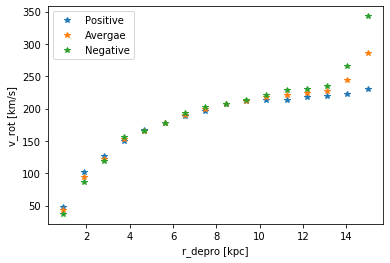

In [30]:
plt.plot(r_dep,max_vel,'*',label = 'Positive')
plt.plot(r_dep,ave_vel,'*',label = 'Avergae')
plt.plot(r_dep,np.abs(min_vel),'*',label = 'Negative')
plt.ylabel('v_rot [km/s]')
plt.xlabel('r_depro [kpc]')
plt.legend()
plt.show

In [37]:
vel_t_7443 = np.sqrt(velocity(r_dep)**2 + v_d(r_dep)**2 + v_h_iso(r_dep)**2)

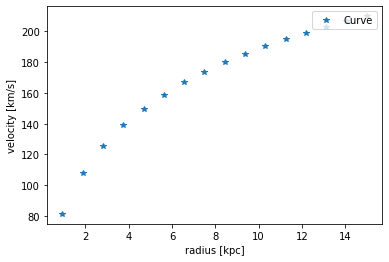

In [39]:
plt.plot(r_dep,vel_t_7443*(3.08*10**13),'*',label = 'Curve')
plt.ylabel('velocity [km/s]')
plt.xlabel('radius [kpc]')
plt.legend(loc='upper right')
plt.show()